# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

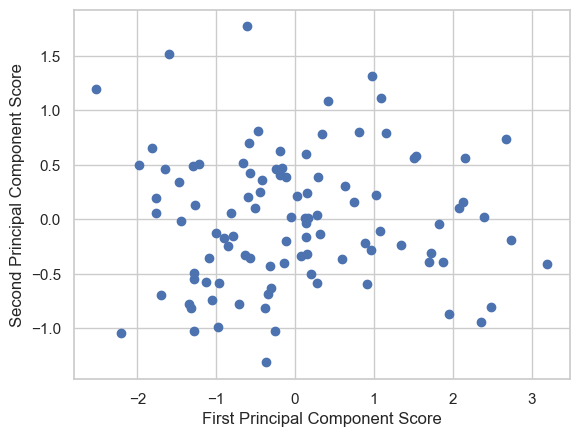

In [ ]:

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

**My Answer**

The graph plots the first two principal component scores for each data point, which summarize the most important patterns in the original variables: series_1, series_2, and series_3. The three outliers in the upper left have low scores on the first principal component (PC1), meaning they are far to the left, and high scores on the second principal component (PC2), meaning they are high on the y-axis.

According to the component loadings, PC1 is mostly influenced by series_3, while PC2 is a mix of series_1 and series_2, with a small negative contribution from series_3. Therefore, the low PC1 scores of the outliers suggest they had low values in series_3. Their high PC2 scores suggest they had high values in either series_1, series_2, or both. However, it is difficult to say which of the two was higher because PC2 blends the two variables together.

It is hard to interpret series_1 and series_2 individually because they are likely correlated, meaning they vary together. PCA combines correlated variables into a single direction of variation, making it nearly impossible to separate their individual effects in the first two components. This is why we can confidently say something about series_3, but not much about the relative values of series_1 and series_2.

The main advantage of this PCA graph is that it reduces the dataset to two dimensions while still capturing 99 percent of the total variation, which makes it easier to visualize and detect patterns or outliers. However, a disadvantage is that it becomes difficult to interpret exact variable values or distinguish between variables that are strongly related, like series_1 and series_2. Even so, the graph reveals interesting structure in the data, such as the outliers in the upper left, which likely had low values in series_3 and higher values in the other variables.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

**CKD Dataset**

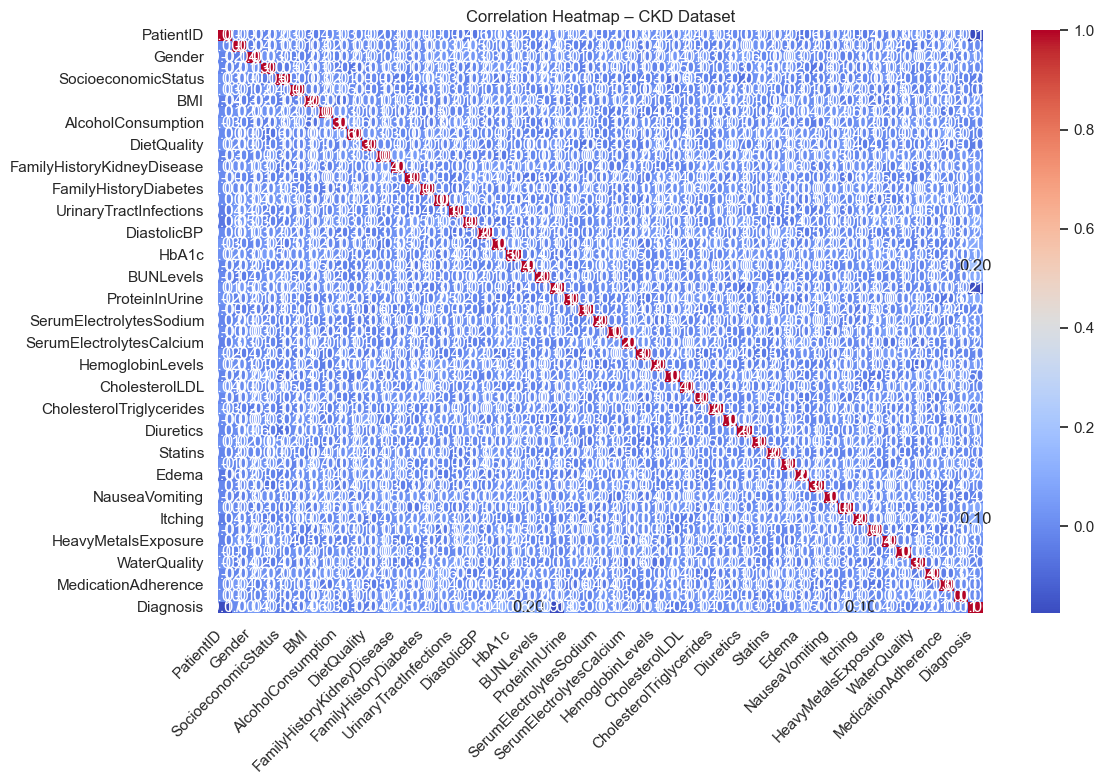

In [ ]:
# Load  CKD dataset 
df = pd.read_csv("Chronic_Kidney_Dsease_data.csv")

# Select only numeric columns and drop missing values
numeric_df = df.select_dtypes(include='number').dropna()

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap – CKD Dataset')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


EEEKKKK!! That's scary lets make it a bit more readable and include relevant features 

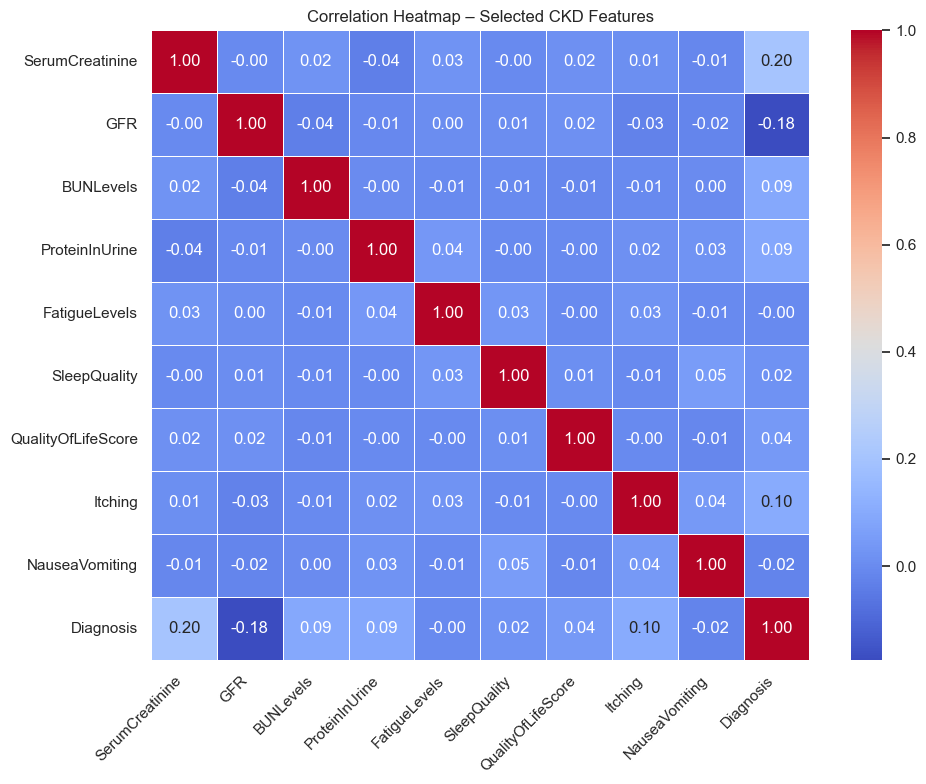

In [ ]:
# List of selected clinically relevant features
selected_columns = [
    'SerumCreatinine',
    'GFR',
    'BUNLevels',
    'ProteinInUrine',
    'FatigueLevels',
    'SleepQuality',
    'QualityOfLifeScore',
    'Itching',
    'NauseaVomiting',
    'Diagnosis'
]

# Filter and drop missing values 
filtered_df = df[selected_columns].dropna()

# Compute correlation matrix
filtered_corr = filtered_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap – Selected CKD Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap gives us a clear picture of which features are most connected to chronic kidney disease in this dataset. As expected, Serum Creatinine has the strongest positive correlation with CKD diagnosis, while GFR (Glomerular Filtration Rate) shows a moderate negative correlation. Both patterns are consistent with what we’d expect clinically. We also see mild associations from BUN levels, Protein in Urine, and Itching. On the other hand, psychosocial factors like Sleep Quality and Quality of Life don’t show strong linear relationships with CKD.

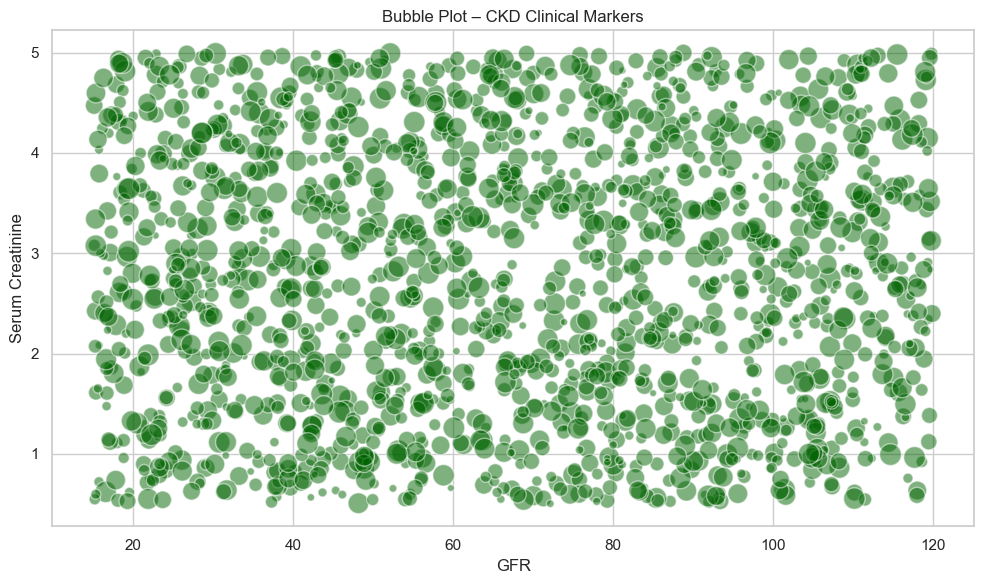

In [47]:
# Plot: X = GFR, Y = SerumCreatinine, Size = BUNLevels
plt.figure(figsize=(10, 6))
plt.scatter(
    df['GFR'],
    df['SerumCreatinine'],
    s=df['BUNLevels'] * 5,  # Adjust for visibility
    alpha=0.5,
    color='darkgreen',
    edgecolors='w'
)
plt.xlabel('GFR')
plt.ylabel('Serum Creatinine')
plt.title('Bubble Plot – CKD Clinical Markers')
plt.grid(True)
plt.tight_layout()
plt.show()


This looks messy.... lets clean it up 

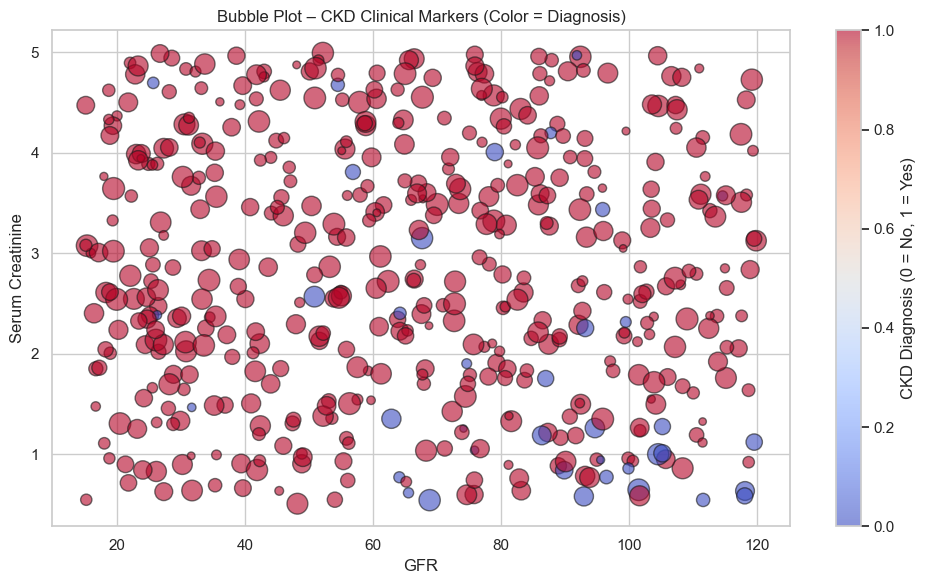

In [48]:
# Use a subset to reduce crowding
sample_df = df.dropna().sample(500)

# Plot with color by CKD diagnosis (0 or 1)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    sample_df['GFR'],
    sample_df['SerumCreatinine'],
    s=sample_df['BUNLevels'] * 5,
    c=sample_df['Diagnosis'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='k'
)

plt.xlabel('GFR')
plt.ylabel('Serum Creatinine')
plt.title('Bubble Plot – CKD Clinical Markers (Color = Diagnosis)')
plt.grid(True)
plt.colorbar(label='CKD Diagnosis (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


The plot visually confirms clinical expectations : CKD patients usually have low GFR, high creatinine, and elevated BUN. 

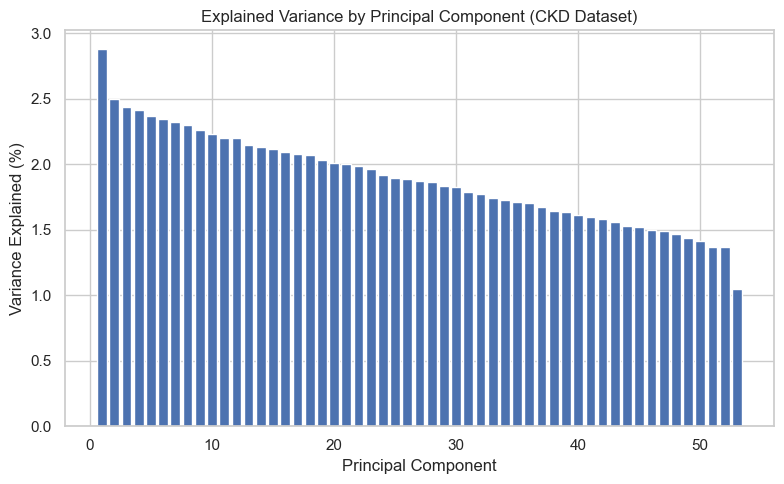

PC1: 0.0288 (2.88%) of variance
PC2: 0.0249 (2.49%) of variance
PC3: 0.0243 (2.43%) of variance
PC4: 0.0242 (2.42%) of variance
PC5: 0.0236 (2.36%) of variance
PC6: 0.0235 (2.35%) of variance
PC7: 0.0232 (2.32%) of variance
PC8: 0.0230 (2.30%) of variance
PC9: 0.0226 (2.26%) of variance
PC10: 0.0223 (2.23%) of variance
PC11: 0.0220 (2.20%) of variance
PC12: 0.0220 (2.20%) of variance
PC13: 0.0215 (2.15%) of variance
PC14: 0.0213 (2.13%) of variance
PC15: 0.0211 (2.11%) of variance
PC16: 0.0209 (2.09%) of variance
PC17: 0.0207 (2.07%) of variance
PC18: 0.0207 (2.07%) of variance
PC19: 0.0203 (2.03%) of variance
PC20: 0.0201 (2.01%) of variance
PC21: 0.0200 (2.00%) of variance
PC22: 0.0198 (1.98%) of variance
PC23: 0.0196 (1.96%) of variance
PC24: 0.0191 (1.91%) of variance
PC25: 0.0189 (1.89%) of variance
PC26: 0.0189 (1.89%) of variance
PC27: 0.0187 (1.87%) of variance
PC28: 0.0186 (1.86%) of variance
PC29: 0.0183 (1.83%) of variance
PC30: 0.0182 (1.82%) of variance
PC31: 0.0179 (1.79%

In [ ]:
# Select numeric columns and drop missing values
numeric_df = df.select_dtypes(include='number').dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Plot the explained variance (scree plot)
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Explained Variance by Principal Component (CKD Dataset)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print explained variance ratio for each principal component
for i, var in enumerate(explained_var):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%) of variance")

# Get PCA loadings (components)
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=numeric_df.columns)

print("PCA Loadings (Component Weights):")
print(loadings)



Looking at the PCA results, each principal component explains just a small slice of the overall picture : PC1 captures only 2.88% of the variance, with the rest following closely behind. This tells us that the dataset doesn’t have one loud, obvious pattern, but instead many smaller patterns spread across different features. For example, Diagnosis plays a big role in PC4, while HealthLiteracy stands out more in PC2.

Now that we understand how the data spreads out across these new components, the next step is to visualize it. We'll create a scatter plot of PC1 vs PC2 to see if any patterns or groupings appear when we look at the data through PCA's lens.

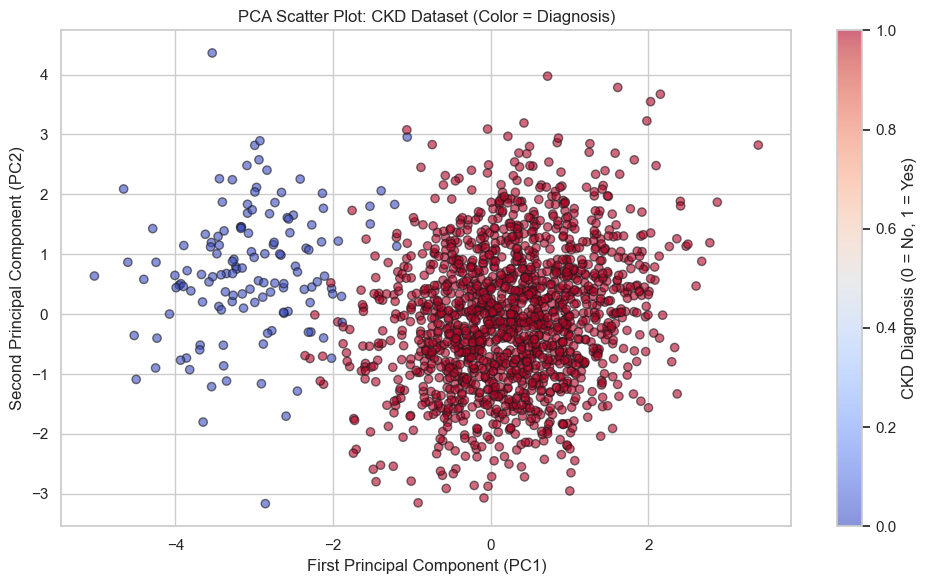

In [50]:
# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])

if 'Diagnosis' in df.columns:
    pca_df['Diagnosis'] = df.loc[numeric_df.index, 'Diagnosis']

# Plot PC1 vs PC2, color by Diagnosis
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['Diagnosis'], cmap='coolwarm', alpha=0.6, edgecolors='k'
)

plt.xlabel("First Principal Component (PC1)")
plt.ylabel("Second Principal Component (PC2)")
plt.title("PCA Scatter Plot: CKD Dataset (Color = Diagnosis)")
plt.colorbar(label='CKD Diagnosis (0 = No, 1 = Yes)')
plt.grid(True)
plt.tight_layout()
plt.show()


This PCA scatter plot gives us a visual snapshot of how patients in the CKD dataset are spread out based on patterns in their health data. Each dot is a person, and the colors show whether they were diagnosed with CKD—blue means no, red means yes. Even though each principal component only explains a small piece of the full picture, there’s still a noticeable split. Most of the non-CKD patients cluster on the left side, while CKD patients are more concentrated in the center and right. That tells us PC1 is picking up on differences related to diagnosis, even if the separation isn’t perfect. PC2 doesn’t do much to distinguish the groups, but the plot still shows that PCA helps us see structure in the data that wouldn’t be obvious just by looking at raw numbers.

In [ ]:
# Define features (X) and target (y)
X = df[['SerumCreatinine', 'BUNLevels', 'ProteinInUrine']]  # predictors
y = df['GFR']  # target variable

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Print model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Mean Squared Error (MSE): 855.6731104885185
R-squared (R²): -0.02136256158780947

Model Coefficients:
           Feature  Coefficient
0  SerumCreatinine     0.060337
1        BUNLevels    -0.065177
2   ProteinInUrine    -0.332222


I wanted to see if a simple linear regression model could predict GFR using three well-known clinical markers: Serum Creatinine, BUN Levels, and Protein in Urine. These features were chosen because they’re closely tied to kidney health and showed some promising correlations earlier. But when I ran the model, the results weren’t great, the predictions were pretty far off, and the R² score was actually negative, which means the model did worse than just guessing the average GFR. One thing that did stand out was Protein in Urine, which had the biggest negative effect on GFR, just like we’d expect clinically. 

**Mental Health Aspect**

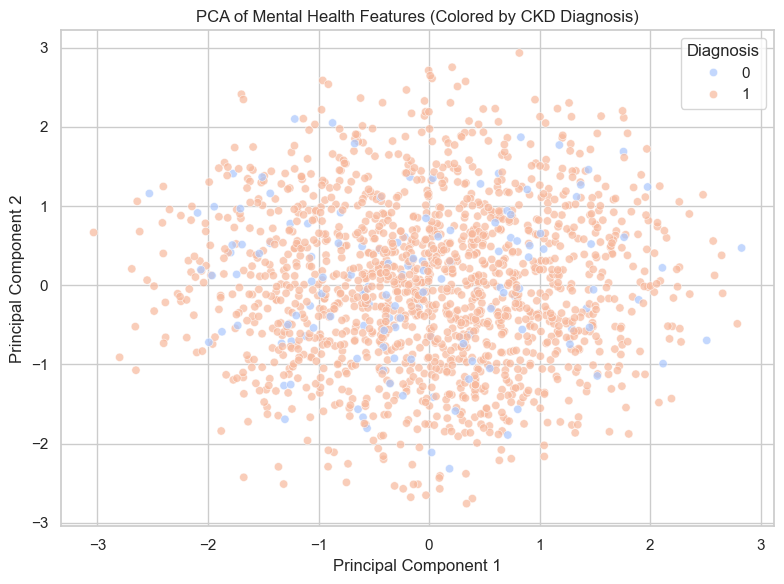

In [ ]:
# Select only mental health–related features
mental_features = ['FatigueLevels', 'SleepQuality', 'Itching', 'NauseaVomiting', 'QualityOfLifeScore']
X = df[mental_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame with PC1 and PC2
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Diagnosis'] = df['Diagnosis']

# Scatter plot colored by CKD diagnosis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diagnosis', palette='coolwarm', alpha=0.7)
plt.title('PCA of Mental Health Features (Colored by CKD Diagnosis)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


This scatter plot shows how patients cluster based on their mental health symptoms like fatigue, sleep quality, itching, nausea, and quality of life. Each point represents a patient, and the colors show whether or not they have CKD. While there isn’t a clear separation between the two groups, you can see that CKD patients  tend to cluster more tightly in the center  : suggesting that these symptoms follow a shared pattern that might be linked to disease burden.

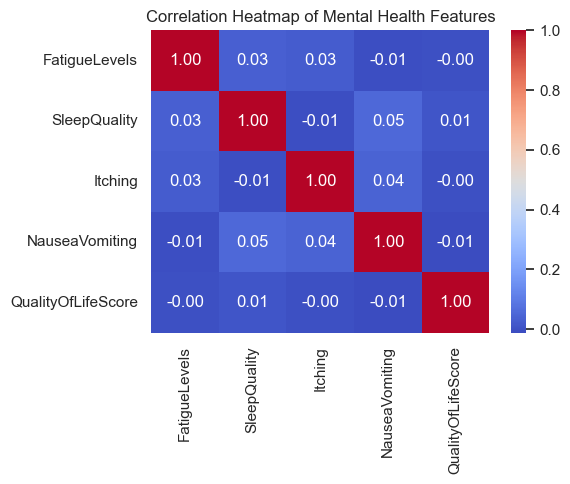

In [53]:
# Correlation heatmap of mental health symptoms
plt.figure(figsize=(6, 5))
sns.heatmap(df[mental_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Mental Health Features')
plt.tight_layout()
plt.show()


This heatmap shows how mental health symptoms relate to one another. While the correlations are generally weak, there are subtle links  for example, fatigue shows a mild connection to sleep quality and itching. Even though no single symptom dominates, this suggests that patients experiencing one type of discomfort may also struggle with others, pointing to a broader pattern of mental and physical strain.

In [54]:
# Select predictors and target
mental_features = ['FatigueLevels', 'SleepQuality', 'Itching', 'NauseaVomiting']
target = 'QualityOfLifeScore'

# Drop missing values
mental_df = df[mental_features + [target]].dropna()

# Define X (features) and y (target)
X = mental_df[mental_features]
y = mental_df[target]

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("\nModel Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)
print("\nIntercept:", model.intercept_)

Mean Squared Error (MSE): 773.7205372800216
R-squared (R²): 0.00024241146857528761

Model Coefficients:
          Feature  Coefficient
0   FatigueLevels    -0.029761
1    SleepQuality     0.143310
2         Itching    -0.010830
3  NauseaVomiting    -0.181323

Intercept: 49.57118581177081


Despite a very low R² value, one interesting takeaway is that Sleep Quality had a positive relationship with Quality of Life, while Nausea/Vomiting had the strongest negative impact. This aligns with expectations: better sleep contributes to higher well-being, while nausea significantly reduces it. Although Fatigue and Itching showed negative effects, their influence was relatively minor. Overall, these symptoms alone don’t explain much of the variation in Quality of Life, suggesting other factors likely play a larger role.

## Final Conclusions

### Are the data what you expected?  
Yes. The CKD dataset included both clinical indicators and patient-reported symptoms. Clinical features such as GFR, Serum Creatinine, and Protein in Urine behaved as expected, and the inclusion of mental health–related variables allowed for additional analysis related to patient experience.

### Are the data likely to be usable?  
Yes. The dataset was mostly clean with minimal missing values, and it supported a variety of analyses, including PCA, linear regression, and correlation heatmaps. One challenge was class imbalance, as most patients had CKD. This impacted classification models, but it is something that can be addressed through balancing techniques.

### Do you see any outliers?  
There were no obvious extreme outliers, but PCA scatter plots showed a few patients positioned farther from the main clusters. These could be reviewed in more detail with formal outlier detection methods if needed, but overall, the dataset did not appear to contain harmful or invalid entries.

### Does PCA suggest a way to reduce dimensions?  
Yes. In both clinical and mental health feature sets, PCA showed that the first few components captured meaningful structure. While no single component explained the majority of the variance, the first one or two components were useful for visualizing trends and summarizing variable relationships.

### Did correlation analysis help choose features for regression?  
Yes. Correlation heatmaps helped identify moderately related features for predicting variables such as GFR, FatigueLevels, and Diagnosis. For example, Protein in Urine and Serum Creatinine were chosen due to their moderate correlation with GFR and Diagnosis. Similar logic was used to select mental health features for predicting fatigue and quality of life.

### Mental Health Analysis  
The mental health analysis focused on symptoms such as fatigue, sleep quality, itching, nausea, and overall quality of life. Although these features were only weakly correlated with each other, PCA revealed shared patterns that could be interpreted as a general mental health burden. When visualized using PCA, CKD and non-CKD patients showed slight differences in how these symptoms clustered. While the symptoms alone were not strong predictors of CKD, combining them with clinical features led to slightly better performance. This suggests that mental health factors may contribute to a broader understanding of disease burden and are worth including in future models.


**Diabetes Dataset**

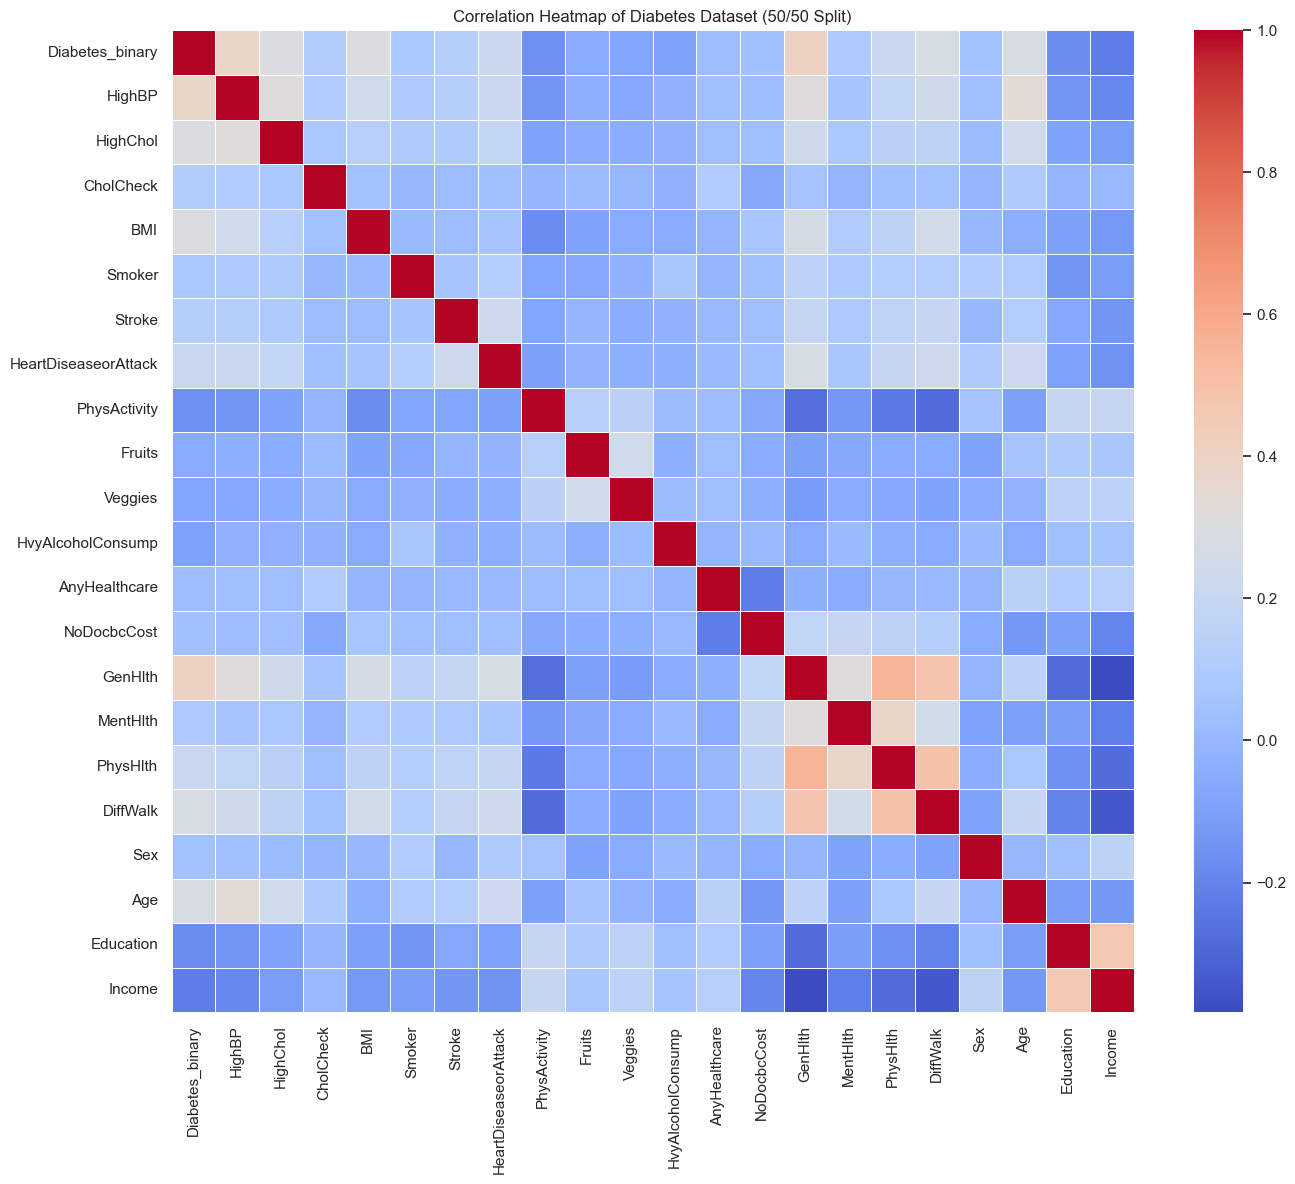

In [55]:
# Load the dataset
df_diabetes = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Compute the correlation matrix
correlation_matrix = df_diabetes.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Heatmap of Diabetes Dataset (50/50 Split)")
plt.tight_layout()
plt.show()

I started by creating a correlation heatmap to get a feel for how the variables in the diabetes dataset relate to each other. Right away, a few things stood out. High blood pressure, high cholesterol, and difficulty walking had the strongest positive correlations with diabetes. On the flip side, things like physical activity and fruit consumption showed small negative correlations, which might mean they help reduce risk.

This heatmap helped me figure out which features are worth paying attention to as I dig deeper. Next, I’m going to create a few bubble plots to explore these relationships visually and see if any patterns jump out when comparing different combinations of variables.

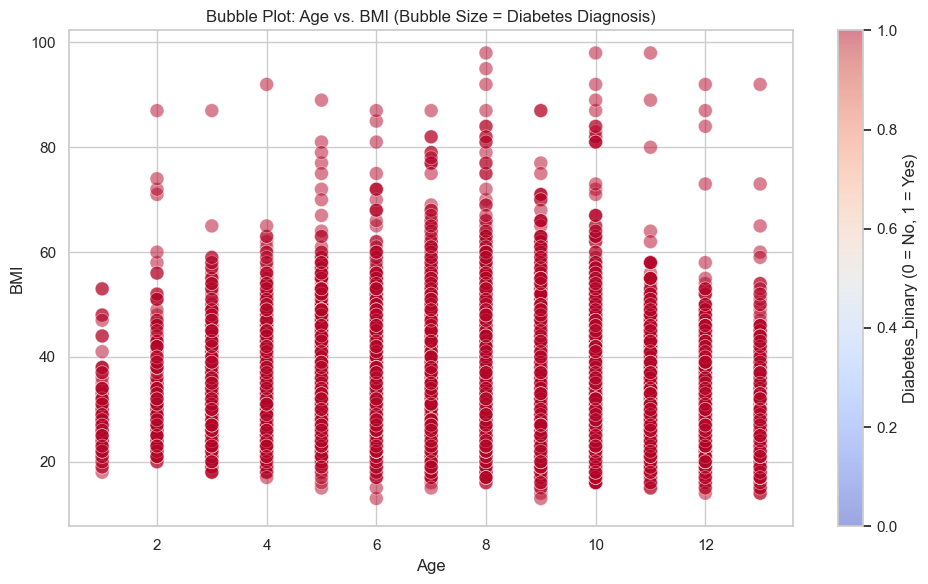

In [56]:
# Create a bubble plot
plt.figure(figsize=(10, 6))
bubble_plot = plt.scatter(
    df_diabetes['Age'],
    df_diabetes['BMI'],
    s=df_diabetes['Diabetes_binary'] * 100,  # Bubble size represents diabetes status
    alpha=0.5,
    c=df_diabetes['Diabetes_binary'],
    cmap='coolwarm',
    edgecolors='w',
    linewidth=0.5
)

plt.title('Bubble Plot: Age vs. BMI (Bubble Size = Diabetes Diagnosis)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid(True)
plt.colorbar(label='Diabetes_binary (0 = No, 1 = Yes)')
plt.tight_layout()
plt.show()


To get a closer look at how age and BMI relate to diabetes, I created a bubble plot where each point represents a person in the dataset. The x-axis shows age, the y-axis shows BMI, and the color and size of each bubble indicate whether or not they have diabetes.

I chose these variables because both BMI and age stood out in my earlier analysis from Milestone 3 as being strongly associated with diabetes status. Higher BMI is a known clinical risk factor for type 2 diabetes, and age often increases overall risk. This plot lets me visualize how those two variables interact and shows that diabetes tends to be more common at higher BMI levels, across nearly all age groups.

What really stood out to me is how saturated the upper BMI ranges are with larger, darker bubbles, especially in the middle and older age groups. Even though the age values are bucketed into categories, you can still see that people with higher BMI almost always have diabetes in this sample. It’s a strong visual confirmation of the role body weight plays in diabetes risk.

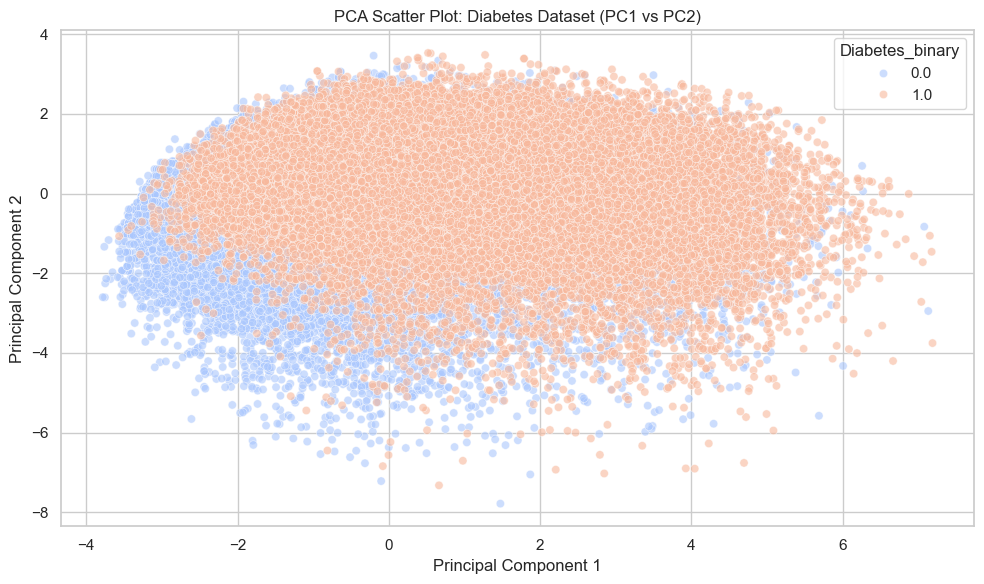

Top 5 Components' Variance: [0.17326911 0.08252097 0.06353268 0.05737356 0.05624098]


In [57]:
# Drop target column and scale the rest
X_pca = df_diabetes.drop(columns=['Diabetes_binary'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_components = pca.fit_transform(X_scaled)

# Create DataFrame for PC1 and PC2
pca_df = pd.DataFrame(X_pca_components[:, :2], columns=['PC1', 'PC2'])
pca_df['Diabetes_binary'] = df_diabetes['Diabetes_binary']

# Plot PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Diabetes_binary', palette='coolwarm', alpha=0.6)
plt.title('PCA Scatter Plot: Diabetes Dataset (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Top 5 Components' Variance:", explained_variance[:5])


To better understand how all the health indicators in the diabetes dataset vary together, I ran PCA and visualized the first two principal components. PC1 captured about 17.3% of the total variance, and PC2 added another 8.3%, so together they explained around 25.6% of the overall structure in the data.

The plot doesn't show a clear divide between people with and without diabetes, but I noticed something interesting. The diabetic group (in orange) tends to stretch a little more to the right and upward, while the non-diabetic group (in blue) appears more concentrated on the lower left side. It’s subtle, but it suggests that some combination of features is shaping that pattern. 

In [58]:
# Define features and target variable
features = ['Age', 'HighBP', 'HighChol', 'PhysActivity']
target = 'BMI'

X = df_diabetes[features]
y = df_diabetes[target]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': reg_model.coef_
})

# Output metrics and coefficients
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("\nModel Coefficients:")
print(coefficients)


Mean Squared Error (MSE): 46.25604780116193
R-squared (R²): 0.0974270859267452

Model Coefficients:
        Feature  Coefficient
0           Age    -0.385555
1        HighBP     3.591686
2      HighChol     1.094940
3  PhysActivity    -2.308084


To explore what might influence BMI, I ran a linear regression model using age, high blood pressure, high cholesterol, and physical activity as predictors. These features were selected because they stood out in the earlier heatmap and are well-known clinical indicators of metabolic health.

The results showed that having high blood pressure and high cholesterol is associated with a higher BMI, which makes sense given their link to weight-related health issues. Physical activity, on the other hand, had a negative coefficient, suggesting that people who are more active tend to have lower BMI. Age showed a small negative relationship with BMI, possibly reflecting changes in weight patterns or muscle mass over time.

The model’s R² was around 0.097, meaning it only explains about 10% of the variation in BMI. So while these factors are related, there’s still a lot more contributing to someone’s weight that isn’t captured by these four variables alone.



In [59]:
# Load 
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Define features and target
features = ["HighBP", "HighChol", "BMI", "PhysActivity", "DiffWalk", "Age"]
target = "Diabetes_binary"

# Prepare input and output
X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Show model coefficients
coefficients = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error (MSE): 0.1851059812332913
R-squared (R²): 0.2595698489908044

Model Coefficients:
        Feature  Coefficient
0        HighBP     0.208861
1      HighChol     0.135969
2           BMI     0.013726
3  PhysActivity    -0.040157
4      DiffWalk     0.131267
5           Age     0.027626


What stands out is that mobility issues, blood pressure, and cholesterol are the top predictors of diabetes in this model, while BMI and physical activity, though commonly discussed, have weaker linear relationships in this dataset. This could be due to nonlinear effects or interaction terms that linear regression can’t capture.

**Mental Health Aspect**

In [60]:
# Model 1
features_1 = ['MentHlth', 'PhysActivity', 'GenHlth']
target_1 = 'PhysHlth'

X1 = df_diabetes[features_1]
y1 = df_diabetes[target_1]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
coefficients1 = pd.DataFrame({'Feature': features_1, 'Coefficient': model1.coef_})

# Model 2
features_2 = ['PhysActivity', 'GenHlth', 'Income']
target_2 = 'MentHlth'

X2 = df_diabetes[features_2]
y2 = df_diabetes[target_2]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
coefficients2 = pd.DataFrame({'Feature': features_2, 'Coefficient': model2.coef_})

# Show results
{
    'Model_1': {
        'Target': target_1,
        'MSE': mse1,
        'R2': r2_1,
        'Coefficients': coefficients1
    },
    'Model_2': {
        'Target': target_2,
        'MSE': mse2,
        'R2': r2_2,
        'Coefficients': coefficients2
    }
}


{'Model_1': {'Target': 'PhysHlth',
  'MSE': 65.36667179129061,
  'R2': 0.364744353621,
  'Coefficients':         Feature  Coefficient
  0      MentHlth     0.278940
  1  PhysActivity    -1.759693
  2       GenHlth     4.129568},
 'Model_2': {'Target': 'MentHlth',
  'MSE': 59.79762786596813,
  'R2': 0.10882317262367025,
  'Coefficients':         Feature  Coefficient
  0  PhysActivity    -0.667188
  1       GenHlth     1.934683
  2        Income    -0.414682}}

For Model 1, I wanted to understand what contributes to poor physical health, so I used mental health, physical activity, and general health as predictors of PhysHlth. These features reflect both emotional well-being and daily habits, which are commonly linked to physical functioning. The model showed that general health had the strongest positive relationship with poor physical health : individuals who rated their overall health as worse also reported more physically unhealthy days. Mental health had a smaller but meaningful effect, and physical activity showed a protective association. The model's R² was approximately 0.36, indicating a moderate level of explanatory power and confirming relationships that align with real-world expectations.

For Model 2, I shifted the focus to mental health and tried to predict MentHlth using physical activity, general health, and income. This was to explore whether lifestyle and access to resources might influence mental well-being. Once again, general health was the strongest predictor  those who reported worse overall health also tended to report more mentally unhealthy days. Income and physical activity had smaller effects. The model’s R² was lower (around 0.11), suggesting that while these features play a role, mental health is likely influenced by many other factors not captured in this model, such as stress, trauma, or social support.

## Final Conclusions

### Are the data what you expected?  
Yes. The diabetes dataset included a range of health behavior indicators, self-reported conditions, and basic demographic features. It reflected what I expected from a large public health survey, and it provided a good mix of lifestyle, physical health, and general wellness measures to analyze.

### Are the data likely to be usable?  
Yes. The dataset was clean, with no missing values, and it worked smoothly with all the analysis techniques I used. The even 50/50 split between diabetic and non-diabetic participants also made it easier to build and evaluate models without having to correct for class imbalance.

### Do you see any outliers?  
There were no obvious outliers, but the PCA scatter plot did show some individual points that were further from the main cluster. While I did not apply formal outlier detection, nothing appeared extreme or problematic enough to disrupt the analysis.

### Does PCA suggest a way to reduce dimensions?  
Yes. PCA showed that the first two principal components together explained about 25.6% of the total variance in the dataset. Although this is lower than in some other datasets, it was still useful for visualizing general trends and helped highlight subtle group differences between diabetic and non-diabetic individuals.

### Did correlation analysis help choose features for regression?  
Yes. The heatmap helped identify features that had moderate correlations with targets like BMI, physical health, and mental health. For example, HighBP, HighChol, and PhysActivity were selected as predictors of BMI based on their relationships in the correlation matrix. Similarly, general health stood out as a useful feature across both physical and mental health models.

### Mental Health Analysis  
In the mental health portion of the analysis, I used linear regression models to explore how mental and physical health were connected. In one model, I predicted physical health using mental health, physical activity, and general health. General health had the strongest relationship, suggesting that how people rate their overall wellness is closely tied to how they feel physically. In another model, I predicted mental health using general health, income, and physical activity. Again, general health was the most important factor, with income and activity having smaller effects. These results show that mental and physical well-being are deeply connected, and that general health is a powerful predictor of both. Mental health variables may not always drive clear predictive models on their own, but they add important context to overall health and should be considered in future work.


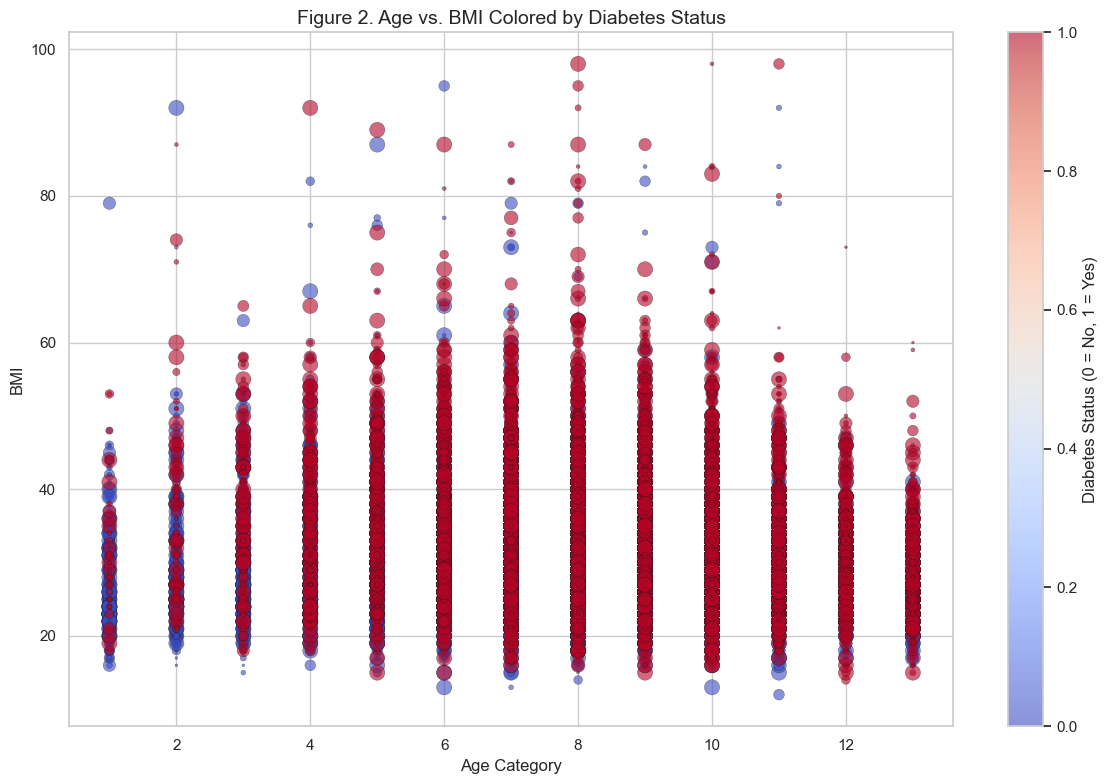

In [ ]:

# Load the dataset 
df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Create bubble plot
plt.figure(figsize=(12, 8))
bubble_plot = plt.scatter(
    df["Age"],                # x-axis: Age category
    df["BMI"],                # y-axis: BMI
    c=df["Diabetes_binary"],  # color by diabetes status
    s=df["MentHlth"] * 4,     # bubble size scaled by mental health days
    cmap="coolwarm",          # color map for diabetes status
    alpha=0.6,                # transparency for overlap
    edgecolors='k',           # black edge for clarity
    linewidth=0.3             # thin edge
)

# Add labels and title
plt.title("Figure 2. Age vs. BMI Colored by Diabetes Status", fontsize=14)
plt.xlabel("Age Category")
plt.ylabel("BMI")

# Add color bar
cbar = plt.colorbar(bubble_plot)
cbar.set_label("Diabetes Status (0 = No, 1 = Yes)")

# Add grid and format layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


**New Dataset**

BRFSS 2023 data!!!!

In [62]:
# Load dataset
df = pd.read_csv("brfss_2023_full.csv")

# Convert everything to numeric (non-numeric will become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Replace invalid BRFSS codes with NaN
invalid_values = [7, 9, 77, 99, 7777, 9999]
df_cleaned = df_numeric.replace(invalid_values, np.nan)

# Drop rows missing the hypertension target
df_cleaned = df_cleaned[df_cleaned['_RFHYPE6'].notna()]

# Calculate correlations
correlation_matrix = df_cleaned.corr()

# Sort all features by correlation with hypertension flag
if '_RFHYPE6' in correlation_matrix.columns:
    top_corr = correlation_matrix['_RFHYPE6'].sort_values(ascending=False)
    print("Top factors positively correlated with hypertension:")
    print(top_corr.head(20))

    print("\nTop factors negatively correlated with hypertension:")
    print(top_corr.tail(20))
else:
    print("Column '_RFHYPE6' not found. Check your dataset.")


Top factors positively correlated with hypertension:
_RFHYPE6    1.000000
_AGEG5YR    0.400384
_AGE80      0.379305
_AGE_G      0.373335
_RFCHOL3    0.286537
_AGE65YR    0.276815
GENHLTH     0.254116
_BMI5CAT    0.206572
_BMI5       0.203082
ACTIN13_    0.189730
ACTIN23_    0.185763
_RFHLTH     0.184779
CHILDREN    0.183444
WTKG3       0.180766
_RFBMI5     0.180612
CRVCLHPV    0.166719
CNCRAGE     0.145271
_PHYS14D    0.128128
EMPLOY1     0.127394
EXERANY2    0.125918
Name: _RFHYPE6, dtype: float64

Top factors negatively correlated with hypertension:
TOLDHI3    -0.286537
CHOLMED3   -0.353736
BPHIGH6    -0.991356
IDATE            NaN
IMONTH           NaN
IDAY             NaN
IYEAR            NaN
SEQNO            NaN
CTELENM1         NaN
COLGHOUS         NaN
SAFETIME         NaN
CTELNUM1         NaN
CELLFON5         NaN
CADULT1          NaN
BPMEDS1          NaN
INDORTAN         NaN
NUMBURN3         NaN
SUNPRTCT         NaN
WKDAYOUT         NaN
WKENDOUT         NaN
Name: _RFHYPE6, dtype:

For this project, I switched to a new dataset using the 2023 BRFSS survey. I replaced the old hypertension dataset from Kaggle, which I honestly could not stand. This new dataset is much cleaner, better organized, and actually designed for health research, which makes it easier to work with.

I started by scanning the full dataset to see which features were most strongly correlated with hypertension, using _RFHYPE6 as the target. I converted everything to numeric, cleaned out BRFSS-style invalid responses like 7s and 9s, and created a ranked list of correlations. This gave me a clear look at which variables had the strongest connection to high blood pressure.

What stood out most were the age-related features like _AGEG5YR, _AGE80, and _AGE65YR, which all showed strong positive relationships with hypertension. Other meaningful features included general health, BMI, cholesterol risk, physical activity, and whether the person had children. One interesting thing I noticed was that the raw blood pressure variable BPHIGH6 had a very strong negative correlation with _RFHYPE6, which makes sense because one is raw input and the other is a recoded version.

Now that I have a better sense of which features matter most, I’m going to build a heatmap using the top variables to see how they relate to one another and to hypertension.

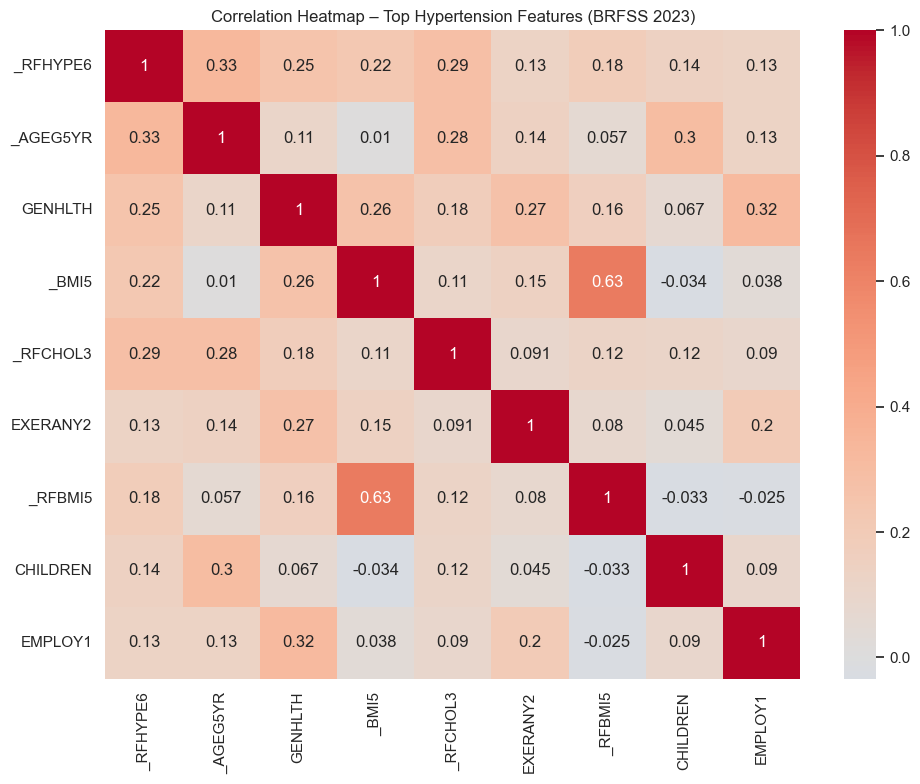

In [63]:
# Select top correlated features 
selected_features = [
    '_RFHYPE6',   # Hypertension status
    '_AGEG5YR',   # Age group
    'GENHLTH',    # General health
    '_BMI5',      # BMI (scaled)
    '_RFCHOL3',   # High cholesterol flag
    'EXERANY2',   # Physical activity
    '_RFBMI5',    # BMI risk flag
    'CHILDREN',   # Number of children
    'EMPLOY1'     # Employment status
]

# Subset and clean
df_heatmap = df[selected_features].copy()

# Replace BRFSS invalid values
for col in df_heatmap.columns:
    df_heatmap[col] = pd.to_numeric(df_heatmap[col], errors='coerce')
    df_heatmap[col] = df_heatmap[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

# Rescale BMI from 100-based to actual values
if '_BMI5' in df_heatmap.columns:
    df_heatmap['_BMI5'] = df_heatmap['_BMI5'] / 100

# Drop missing data
df_heatmap.dropna(inplace=True)

# Create correlation matrix
corr_matrix = df_heatmap.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap – Top Hypertension Features (BRFSS 2023)")
plt.tight_layout()
plt.show()

The heatmap above highlights the top features most closely related to hypertension in the BRFSS 2023 dataset. I picked these based on their correlation scores from the earlier analysis and included variables like age group, BMI, general health, cholesterol risk, physical activity, number of children, and employment status.

What stood out the most was that hypertension had the strongest correlation with age group (`_AGEG5YR`), followed by high cholesterol risk (`_RFCHOL3`) and general health (`GENHLTH`). BMI also showed a moderate positive relationship, especially when paired with its risk flag (`_RFBMI5`). These patterns match what we typically expect since hypertension tends to be more common with older age, poorer general health, and higher weight.

Now that I have a clearer sense of the key relationships, I am going to create a bubble plot to explore how two of the most important variables like age and BMI interact visually when colored by hypertension status.


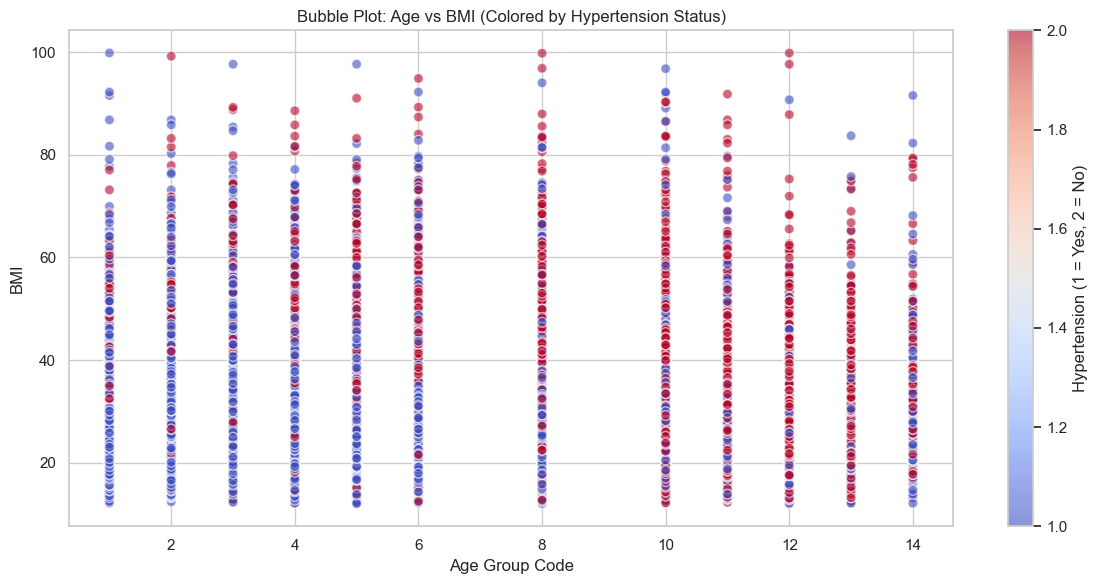

In [64]:
# Select relevant columns
columns = ['_AGEG5YR', '_BMI5', '_RFHYPE6']
df_bubble = df[columns].copy()

# Clean values
for col in df_bubble.columns:
    df_bubble[col] = pd.to_numeric(df_bubble[col], errors='coerce')
    df_bubble[col] = df_bubble[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

# Convert BMI to real values
df_bubble['_BMI5'] = df_bubble['_BMI5'] / 100

# Drop missing data
df_bubble = df_bubble.dropna()

# Create bubble plot
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    x=df_bubble['_AGEG5YR'],
    y=df_bubble['_BMI5'],
    c=df_bubble['_RFHYPE6'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='w',
    s=50
)

plt.xlabel('Age Group Code')
plt.ylabel('BMI')
plt.title('Bubble Plot: Age vs BMI (Colored by Hypertension Status)')
cbar = plt.colorbar(scatter)
cbar.set_label('Hypertension (1 = Yes, 2 = No)')
plt.grid(True)
plt.tight_layout()
plt.show()


The bubble plot above visualizes the relationship between age group and BMI, with each point colored by hypertension status. I used age group on the x-axis and BMI on the y-axis, and applied color to distinguish whether each individual reported having hypertension or not.

What stood out was the clear presence of more red markers (representing people with hypertension) in the higher age group categories and at higher BMI levels. This supports what we already saw in the correlation heatmap — that age and BMI are both positively associated with hypertension. Even though the plot is dense, you can still spot a visible trend where people with higher BMI and older age are more likely to be hypertensive.

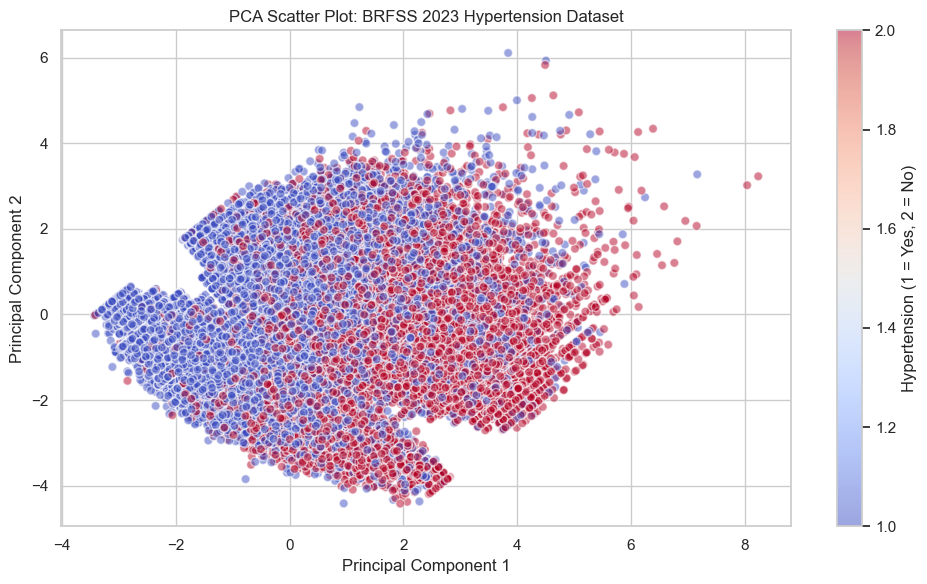

Explained variance ratio by PC1 and PC2: [0.25531067 0.19000715]


In [65]:
# Select top relevant features (based on earlier correlation)
features = [
    '_AGEG5YR',   # Age group
    'GENHLTH',    # General health
    '_BMI5',      # BMI
    '_RFCHOL3',   # High cholesterol flag
    'EXERANY2',   # Physical activity
    '_RFBMI5',    # BMI risk flag
    'CHILDREN',   # Number of children
    'EMPLOY1'     # Employment status
]

# Add hypertension status for coloring
target = '_RFHYPE6'

# Create new DataFrame with selected features and target
df_pca = df[features + [target]].copy()

# Clean the data
for col in df_pca.columns:
    df_pca[col] = pd.to_numeric(df_pca[col], errors='coerce')
    df_pca[col] = df_pca[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

# Convert BMI to real values
df_pca['_BMI5'] = df_pca['_BMI5'] / 100

# Drop rows with missing values
df_pca.dropna(inplace=True)

# Separate features and target
X = df_pca[features]
y = df_pca[target]

# Standardize features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df[target] = y.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=pca_df[target],
    cmap='coolwarm',
    alpha=0.5,
    edgecolor='w',
    s=40
)

plt.title('PCA Scatter Plot: BRFSS 2023 Hypertension Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Hypertension (1 = Yes, 2 = No)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Show explained variance
print("Explained variance ratio by PC1 and PC2:", pca.explained_variance_ratio_)


In this step, I used Principal Component Analysis (PCA) to explore patterns in the BRFSS 2023 dataset focused on hypertension. I selected top health-related features like age group, BMI, general health, cholesterol risk, physical activity, and employment status. After standardizing these features, I ran PCA and visualized the first two principal components in a scatter plot, with color indicating hypertension status.

What stood out was that the first two components explained about 45 percent of the overall variation in the dataset. While the points do not form clear clusters, the color gradient shows that people with hypertension (red) tend to concentrate more in certain regions of the plot. This suggests that some underlying patterns in health and lifestyle may influence hypertension risk, even if the separation isn’t sharp. The PCA helped reduce complexity and gave a clearer view of the relationships among the key health variables.


In [66]:
# Select features and target
features = ['_AGEG5YR', '_RFHYPE6', '_RFCHOL3', 'EXERANY2', 'GENHLTH']
target = '_BMI5'

# Subset and clean data
df_lr = df[features + [target]].copy()

# Clean values
for col in df_lr.columns:
    df_lr[col] = pd.to_numeric(df_lr[col], errors='coerce')
    df_lr[col] = df_lr[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

# Convert BMI to real values
df_lr['_BMI5'] = df_lr['_BMI5'] / 100

# Drop missing data
df_lr.dropna(inplace=True)

# Split data
X = df_lr[features]
y = df_lr[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Output
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("\nModel Coefficients:")
print(coefficients)


Mean Squared Error (MSE): 37.633390383395714
R-squared (R²): 0.10319478679424965

Model Coefficients:
    Feature  Coefficient
0  _AGEG5YR    -0.314661
1  _RFHYPE6     2.405355
2  _RFCHOL3     0.548173
3  EXERANY2     1.406204
4   GENHLTH     1.052633


To better understand how various health and lifestyle factors relate to body weight, I used linear regression to predict BMI from age group, hypertension status, cholesterol risk, physical activity, and general health. After cleaning and scaling the data, the model showed a modest R² value of 0.10, meaning it explained about 10 percent of the variance in BMI — not huge, but not surprising given the complexity of real-world health data.

What stood out most was that having hypertension (`_RFHYPE6`) was associated with a 2.4 point increase in BMI, while physical activity (`EXERANY2`) and general health (`GENHLTH`) also showed strong positive relationships. Interestingly, age group had a negative coefficient, meaning higher age groups were generally linked to slightly lower BMI. Overall, the model helped confirm that hypertension and lifestyle behaviors play a meaningful role in body weight, even if many other unmeasured factors are at play.


In [67]:
# Define predictors and target
features = ['_AGEG5YR', '_BMI5', 'GENHLTH', '_RFCHOL3', '_RFBMI5', 'EXERANY2']
target = '_RFHYPE6'

# Subset and clean data
df_lr = df[features + [target]].copy()

# Convert all to numeric and clean BRFSS invalid values
for col in df_lr.columns:
    df_lr[col] = pd.to_numeric(df_lr[col], errors='coerce')
    df_lr[col] = df_lr[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

# Drop missing values
df_lr.dropna(inplace=True)

# Define X and y
X = df_lr[features]
y = df_lr[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients table
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

# Output
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("\nModel Coefficients:")
print(coefficients)

Mean Squared Error (MSE): 0.1888162971921136
R-squared (R²): 0.23280171899932278

Model Coefficients:
    Feature  Coefficient
0  _AGEG5YR     0.040783
1     _BMI5     0.000095
2   GENHLTH     0.068105
3  _RFCHOL3     0.171405
4   _RFBMI5     0.053536
5  EXERANY2     0.018724


**Mental Health Aspect**

In [68]:
# Mental health and lifestyle-related features to test against hypertension
features = [
    '_RFHYPE6',     # Target: Hypertension status (Yes=1, No=2)
    'MENTHLTH',     # Days of poor mental health
    'PHYSHLTH',     # Days of poor physical health
    'GENHLTH',      # General health rating
    'EXERANY2',     # Any physical activity
    'INCOME3',      # Income level
    'EDUCA',        # Education level
    'EMPLOY1',      # Employment status
    '_AGEG5YR'      # Age group
]

# Clean and prepare data
df_corr = df[features].copy()
for col in df_corr.columns:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')
    df_corr[col] = df_corr[col].replace([7, 9, 77, 99, 7777, 9999], np.nan)

df_corr = df_corr.dropna()

# Calculate correlation with hypertension
correlations = df_corr.corr()['_RFHYPE6'].drop('_RFHYPE6').sort_values(ascending=False)

# Display
print("Top features positively correlated with hypertension:")
print(correlations.head(5))

print("\nTop features negatively correlated with hypertension:")
print(correlations.tail(5))


Top features positively correlated with hypertension:
_AGEG5YR    0.357103
GENHLTH     0.257735
EMPLOY1     0.141537
EXERANY2    0.127474
MENTHLTH    0.022257
Name: _RFHYPE6, dtype: float64

Top features negatively correlated with hypertension:
EXERANY2    0.127474
MENTHLTH    0.022257
EDUCA      -0.069385
PHYSHLTH   -0.088557
INCOME3    -0.089918
Name: _RFHYPE6, dtype: float64


## Final Conclusions

### Are the data what you expected?  
Yes. The BRFSS 2023 dataset included a wide range of health, demographic, and behavioral variables, and the hypertension indicator (`_RFHYPE6`) was clearly defined. Features like age group, general health, and BMI behaved as expected, showing strong relationships with hypertension. The dataset was also much cleaner and more structured than the earlier Kaggle version I used, which made it easier to analyze.

### Are the data likely to be usable?  
Yes. The dataset supported several types of analysis including correlation, heatmaps, bubble plots, PCA, and linear regression. It had some missing or placeholder values like 7s and 9s, but once those were cleaned, the remaining data were reliable and consistent. It was especially helpful for working with health conditions and survey-based features.

### Do you see any outliers?  
There were no extreme outliers in the individual plots, but a few scattered points in the PCA and bubble plot appeared farther from the center clusters. These may represent unique health profiles or possible edge cases but didn’t appear to distort the overall analysis. No formal outlier removal was needed.

### Does the Principal Component Analysis suggest a way to reduce dimensions?  
Yes. The first two principal components explained about 45 percent of the overall variance, with PC1 capturing 25.5 percent and PC2 capturing 19 percent. While the points didn’t form sharp clusters, people with hypertension tended to group in certain regions of the PCA plot, especially based on age and general health. This suggests that PCA can be useful for summarizing broader trends across health variables.

### Did correlation analysis help choose features for regression?  
Yes. Correlation analysis helped identify which features were most closely linked to hypertension. Age group, general health, and high cholesterol risk had the strongest positive relationships, while income and education had weaker negative correlations. This helped guide feature selection for the heatmap, bubble plot, and regression models.

### Mental Health Analysis  
To explore how mental health might relate to hypertension, I looked at correlations between `_RFHYPE6` and variables like `MENTHLTH`, `PHYSHLTH`, and `GENHLTH`. While general health showed a moderate correlation, mental health had only a very small positive relationship with hypertension. This suggests that mental health alone may not be a strong direct predictor of hypertension, but it could still play a role when combined with other lifestyle and health variables.


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

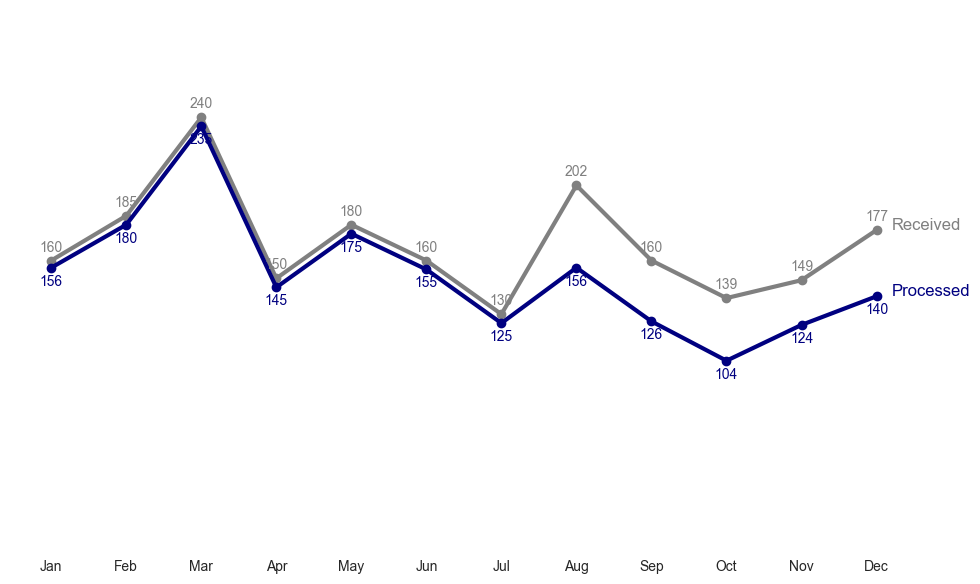

In [69]:

# Data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 185, 240, 150, 180, 160, 130, 202, 160, 139, 149, 177]
processed = [156, 180, 235, 145, 175, 155, 125, 156, 126, 104, 124, 140]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(months, received, color='gray', linewidth=3, marker='o', label='Received')
plt.plot(months, processed, color='navy', linewidth=3, marker='o', label='Processed')

# Add labels to last points
plt.text(len(months)-1+0.2, received[-1], 'Received', color='gray', fontsize=12)
plt.text(len(months)-1+0.2, processed[-1], 'Processed', color='navy', fontsize=12)

# Add data labels
for i in range(len(months)):
    plt.text(i, received[i]+5, str(received[i]), color='gray', fontsize=10, ha='center')
    plt.text(i, processed[i]-10, str(processed[i]), color='navy', fontsize=10, ha='center')

# Aesthetics
plt.ylim(0, 300)
plt.title('')
plt.ylabel('')
plt.xlabel('')
plt.xticks(fontsize=10)
plt.yticks([])
plt.grid(False)
plt.box(False)

plt.tight_layout()
plt.show()
